Load Data from seaborn dataset

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.head()

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(x='sepal_length',y='sepal_width', data=df, hue='species',palette='Set1', s=70)
plt.title('Sepal')
plt.show()

In [ ]:
sns.scatterplot(x='petal_length',y='petal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('Petal')
plt.show()

In [ ]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_cols]
X.head()

In [ ]:
X = df.drop('species', axis=1)
X.head()

In [ ]:
y = df.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

# Naive Bayes - Cross Validation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

df = sns.load_dataset('iris')
X = df.drop('species', axis=1)
y = df.species

model = GaussianNB()
cvs = cross_val_score(model, X, y, cv=10)
print('cross val scores', cvs.round(3))
print('mean = ', cvs.mean().round(4) * 100)

cross val scores [0.933 0.933 1.    0.933 0.933 0.933 0.867 1.    1.    1.   ]
mean =  95.33


# Naive Bayes - Train/Test split

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

df = sns.load_dataset('iris')
X = df.drop('species', axis=1)
y = df.species

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy Score:  0.9777777777777777
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]


show the data that predict false

In [ ]:
import pandas as pd
dy = pd.DataFrame()
dy['y_test'] = y_test
dy['y_pred'] = y_pred
dy['result'] = y_test == y_pred

dy[dy.result == False]

,y_test,y_pred,result
119,virginica,versicolor,False


#SVM

In [ ]:
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

df = sns.load_dataset('iris')
X = df.drop('species', axis=1)
y = df.species

model = SVC(kernel='linear')

cvs = cross_val_score(model, X, y, cv=10)
print('cross val scores', cvs.round(3))
print('mean (%) = {:.4f}' .format(cvs.mean() * 100 ))

cross val scores [1.    0.933 1.    1.    0.867 1.    0.933 1.    1.    1.   ]
mean (%) = 97.3333


# Random Forest

Score -> 0.9778
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.91      0.95        11

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 19  0]
 [ 0  1 10]]


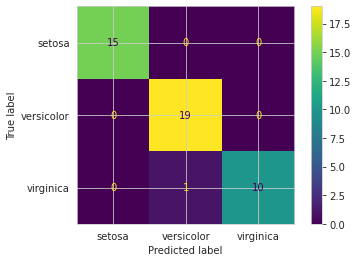

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report


df = sns.load_dataset('iris')
X = df.drop('species', axis=1)
y = df.species

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier(n_estimators=80)
model.fit(X_train, y_train)

class_names = df.species.unique()
class_names

y_predict = model.predict(X_test)

print('Score -> {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=class_names))
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = class_names)
cm_display.plot()
plt.show()

# Exercise: Classify dataset pima-indians-diabetes.data.csv

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qNpoW6TcRxbt7tSzwgoyLJoLwlUijaGH' -O pima-indians-diabetes.data.csv


In [ ]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("pima-indians-diabetes.data.csv")

print(df)

In [ ]:
df.isnull().sum()

In [ ]:
X = df.drop(['PatientID','HasDiabetes'], axis=1)
X.sample(5)

In [ ]:
y = df.HasDiabetes
y.sample(5)

In [ ]:
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel='linear')

cvs = cross_val_score(model, X, y, cv=10)
print('cross val scores', cvs.round(3))
print('mean (%) = {:.4f}' .format(cvs.mean() * 100 ))

cross val scores [0.701 0.766 0.792 0.74  0.74  0.766 0.805 0.792 0.75  0.816]
mean (%) = 76.6969


Score -> 0.7792
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       137
           1       0.84      0.56      0.68        94

    accuracy                           0.78       231
   macro avg       0.80      0.75      0.75       231
weighted avg       0.79      0.78      0.77       231

[[127  10]
 [ 41  53]]


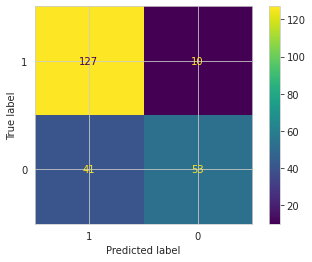

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

class_names = df.HasDiabetes.unique()
class_names

y_predict = model.predict(X_test)

print('Score -> {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict))
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = class_names)
cm_display.plot()
plt.show()

# DT, NB, RF

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TVz1opVqHadqyuinDEG5fPjXzVxkGobn' -O diabetes.csv

In [ ]:
pip install -U scikit-learn

# DecisionTree

              precision    recall  f1-score   support

          no       0.74      0.73      0.74       100
         yes       0.52      0.54      0.53        54

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.67      0.66      0.66       154
 



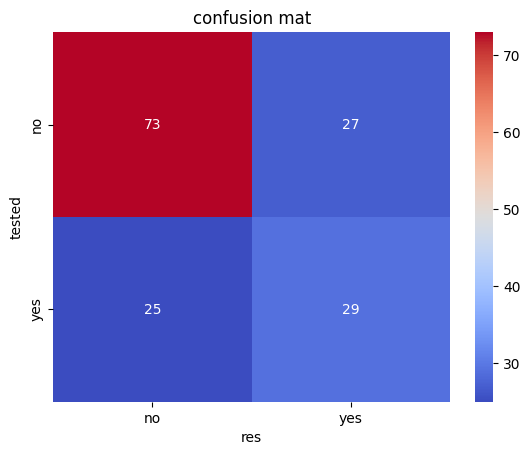

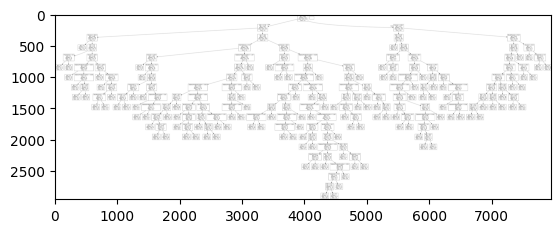

In [54]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('diabetes.csv')
y = df['Outcome']
x = df.drop('Outcome', axis=1)

features = list(x.columns)
class_names = ['no', 'yes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)

y_res = model.predict(x_test)

print(classification_report(y_test, y_res, target_names=class_names), '\n')

cm = confusion_matrix(y_test, y_res)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='coolwarm')
ax.set_title("confusion mat")
ax.set_xlabel('res')
ax.set_ylabel('tested')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

print('\n')

data = tree.export_graphviz(model, out_file=None, feature_names=features, class_names=class_names)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('decision_tree.png')
img = pltimg.imread('decision_tree.png')
plt.imshow(img)
plt.show()

# DecisionTree (crossval)


In [57]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('diabetes.csv')
y = df['Outcome']
x = df.drop('Outcome', axis=1)

model = DecisionTreeClassifier()
model = cross_val_score(model, x, y, cv=70)

model.mean().round(4)*100


70.45

# Naive

              precision    recall  f1-score   support

          no       0.78      0.84      0.81       100
         yes       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154
 



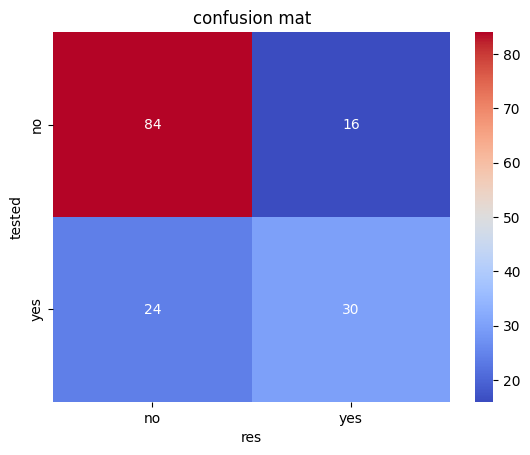

In [56]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('diabetes.csv')
y = df['Outcome']
x = df.drop('Outcome', axis=1)

features = list(x.columns)
class_names = ['no', 'yes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

# model config
model = GaussianNB()
model = model.fit(x_train, y_train)

y_res = model.predict(x_test)

print(classification_report(y_test, y_res, target_names=class_names), '\n')

cm = confusion_matrix(y_test, y_res)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='coolwarm')
ax.set_title("confusion mat")
ax.set_xlabel('res')
ax.set_ylabel('tested')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

# Naive (crossval)

In [58]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('diabetes.csv')
y = df['Outcome']
x = df.drop('Outcome', axis=1)

features = list(x.columns)
class_names = ['no', 'yes']

# model config
model = GaussianNB()
model = cross_val_score(model, x, y, cv=70)

model.mean().round(4)*100

75.38

# RandomForest

              precision    recall  f1-score   support

          no       0.76      0.87      0.81       100
         yes       0.68      0.50      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.69       154
weighted avg       0.73      0.74      0.73       154
 



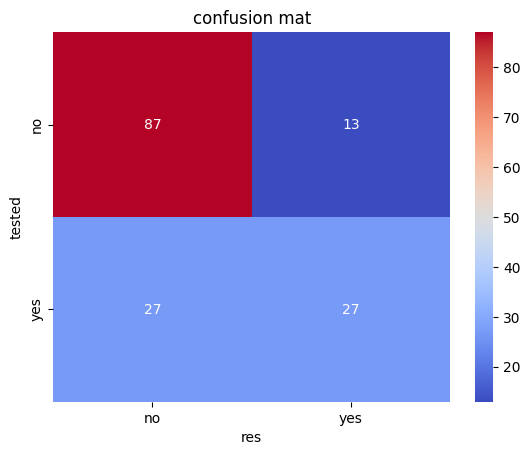

In [69]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('diabetes.csv')
y = df['Outcome']
x = df.drop('Outcome', axis=1)

features = list(x.columns)
class_names = ['no', 'yes']

# model config
model = RandomForestClassifier(n_estimators=80)
model = model.fit(x_train, y_train)

y_res = model.predict(x_test)

print(classification_report(y_test, y_res, target_names=class_names), '\n')

cm = confusion_matrix(y_test, y_res)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='coolwarm')
ax.set_title("confusion mat")
ax.set_xlabel('res')
ax.set_ylabel('tested')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

# RandomForest (crossval)

In [70]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('diabetes.csv')
y = df['Outcome']
x = df.drop('Outcome', axis=1)

features = list(x.columns)
class_names = ['no', 'yes']

# model config
model = RandomForestClassifier(n_estimators=80)
model = cross_val_score(model, x, y, cv=70)

model.mean().round(4)*100

76.44